# DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS

### IMPORT LIBRARIES

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

#### IMPORT RAW DATA 

In [5]:
bk = pd.read_csv('blinkit-data-dataset.csv')

#### SAMPLE DATA

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
import warnings

warnings.filterwarnings('ignore')

In [9]:
bk.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [10]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### ROWS AND COLUMNS

In [12]:
print('rows :-',bk.shape[0],'columns:-',bk.shape[1])

rows :- 8523 columns:- 12


###  FEILD INFORMATION

In [14]:
bk.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### DATA TYPES

In [16]:
bk.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### data standardization.

In [18]:
bk['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [19]:
bk['Item Fat Content'] = bk['Item Fat Content'].replace({
    'low fat':'Low Fat',
    'LF':'Low Fat',
    'reg':'Regular'
})

In [20]:
bk['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

### KPI's REQUIREMENTS

In [22]:
total_sale = bk['Sales'].sum()

avg_sale = bk['Sales'].mean()

no_of_sale = bk['Sales'].count()

avg_rating = bk['Rating'].mean()

print("KPI's REQUIREMENTS")
print('__________________ ')
print(f'TOTAL SALES:-  {total_sale:,.0f}')
print(F'AVERAGE SALES:- {avg_sale:,.0f}')
print(f'NO. OF ITEMS SOLD:- {no_of_sale}')
print(f'AVERAGE RATING:- {avg_rating:,.0f}')

KPI's REQUIREMENTS
__________________ 
TOTAL SALES:-  1,201,681
AVERAGE SALES:- 141
NO. OF ITEMS SOLD:- 8523
AVERAGE RATING:- 4


## BUSINESS REQUIREMENTS

### CHARTS REQUIREMENTS 

### 1. Total Sales by Fat Content:

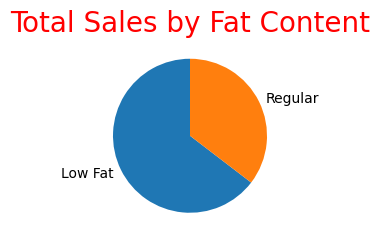

In [26]:
plt.figure(figsize=(5,2.5))
tsbfc = bk.groupby('Item Fat Content')['Sales'].sum()
plt.pie(tsbfc,labels=tsbfc.index,startangle=90)
plt.title('Total Sales by Fat Content',size=20,color='red')
plt.show()

### 2. Total Sales by Item Type:

In [28]:
tsbit = bk.groupby('Item Type')['Sales'].sum().sort_values(ascending=True)

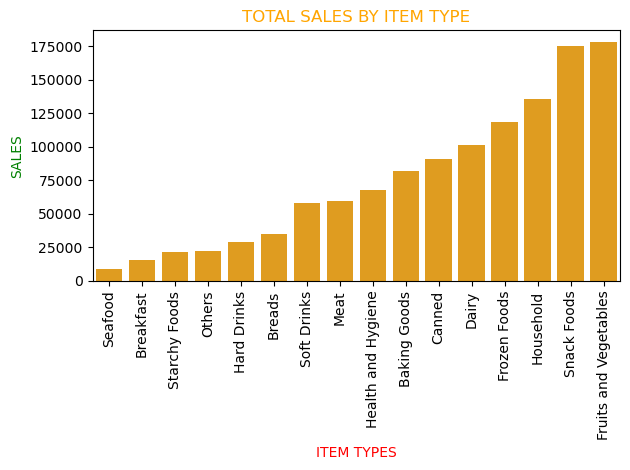

In [29]:
sns.barplot(x=tsbit.index,y=tsbit.values,color='orange')
plt.xticks(rotation = 90)
plt.title('TOTAL SALES BY ITEM TYPE',color='orange')
plt.xlabel('ITEM TYPES',color = 'red')
plt.ylabel('SALES',color = 'g')
plt.tight_layout()
plt.show()

### 3. Fat Content by Outlet for Total Sales:

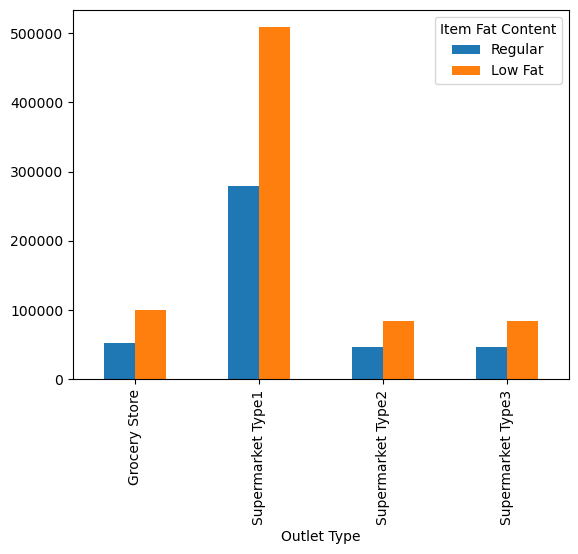

In [114]:
fcbofts = bk.groupby(['Outlet Type','Item Fat Content'])['Sales'].sum().unstack()
fcbofts = fcbofts[['Regular', 'Low Fat']]

ax = fcbofts.plot(kind='bar')

### 4. Total Sales by Outlet Establishment:


In [145]:
time = bk.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

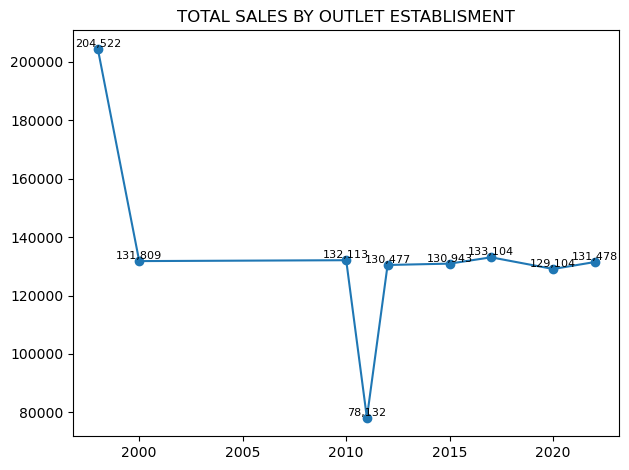

In [157]:
plt.plot(time.index,time.values,marker='o',linestyle='-')
plt.title('TOTAL SALES BY OUTLET ESTABLISMENT')
for x , y in zip(time.index,time.values):
    plt.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()

### 5. Sales by Outlet Size:


In [166]:
sbos = bk.groupby('Outlet Size')['Sales'].sum()

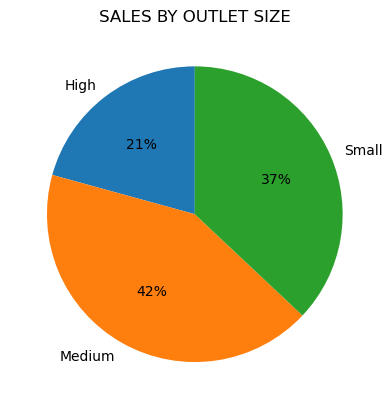

In [180]:
plt.pie(sbos,labels=sbos.index,startangle=90,autopct='%.0f%%')
plt.title('SALES BY OUTLET SIZE')
plt.show()

### 6. Sales by Outlet Location:


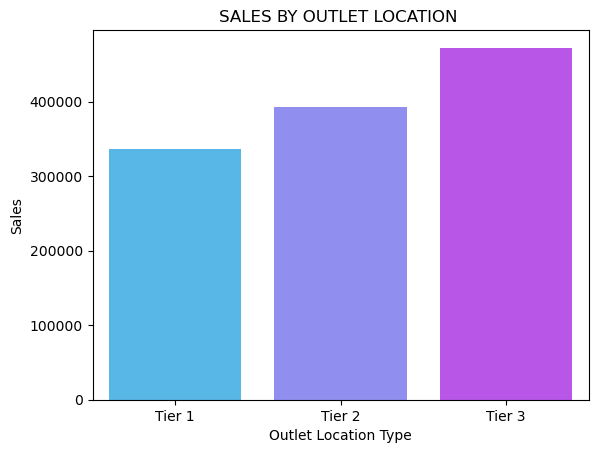

In [203]:
sbol = bk.groupby('Outlet Location Type')['Sales'].sum()
sns.barplot(sbol,palette='cool' )
plt.title('SALES BY OUTLET LOCATION ')
plt.show()